![example](images/director_shot.jpeg)

# IMDB Project Phase 1

**Authors:** Brett Zimmerman, Sanjit Varma, Douglas Lu, Tony Bai
***

## Overview

Microsoft is attempting to break into original content film making by creating a new movie studio. Using data from online movie resource websites such as Rotten Tomatoes and IMDB, our group cross analyzed Revenue agasint, release month, genre and ----. Through this analysis we are able to recommend 

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

In [42]:
# Here you run your code to explore the data
dfbom = pd.read_csv('data/zippeddata/bom.movie_gross.csv')


df_imdb_name = pd.read_csv('data/zippeddata/imdb.name.basics.csv')


df_imdb_titleb = pd.read_csv('data/zippeddata/imdb.title.basics.csv')


# df = pd.read_csv('data/zippeddata/bom.movie_gross.csv')
# df.info()
# df.head()

df_imdb_title = pd.read_csv('data/zippeddata/imdb.title.crew.csv')


df_imdb_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv')

df_imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv')

tsv_file='data/zippeddata/rt.movie_info.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.movie_info.csv',index=False)


tsv_file='data/zippeddata/rt.reviews.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.reviews.csv',index=False)


df_tmdb_movies = pd.read_csv('data/zippeddata/tmdb.movies.csv')


df_budget = pd.read_csv('data/zippeddata/tn.movie_budgets.csv')





## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [200]:

# cleaned the tdmb Budget data set
# converted the last 3 col to float and removed the $

df_budget[df_budget.columns[3:6]] = df_budget[df_budget.columns[3:6]].replace('[\$,]', '', regex=True).astype(float)

# created another row to determine wether the film grossed a profit
df_budget['profit'] = df_budget['worldwide_gross']- df_budget['production_budget']

# created a row of booleans returning True if profit exceeds 0
df_budget['fin_success'] =  (df_budget['profit'] > 0 )

df_budget.head()
df_budget['fin_success'].value_counts() # 3657 made money, 2125 lost money
df_budget['fin_success'].describe()     

df_imdb_comb = pd.merge(df_imdb_titleb,df_imdb_ratings,on='tconst')


#combined data frame from budget and imdb title 
df_budget_genre = df_budget.merge(df_imdb_titleb, left_on='movie', right_on='primary_title') 

#clean the genres into rows so they can be categorized
df_budget_genre['genres'] = df_budget_genre['genres'].str.strip().str.split(',')
single_genre = df_budget_genre.explode('genres')



budget_genre= df_budget.merge(single_genre, left_on='movie', right_on='primary_title')

budget_genre.drop(columns=['id_x','movie_x', 'production_budget_x', 'id_y', 'release_date_y', 
                           'production_budget_y', 'domestic_gross_y', 'worldwide_gross_y', 
                           'profit_y', 'fin_success_y', 'tconst','primary_title', 
                           'original_title', 'start_year' ], inplace = True )


budget_genre['release_month'] = df_budget_genre['release_date'].map(lambda x : x[:3])

budget_genre

,release_date_x,domestic_gross_x,worldwide_gross_x,profit_x,fin_success_x,movie_y,runtime_minutes,genres,release_month
0,"Dec 18, 2009",760507625.0,2.776345e+09,2.351345e+09,True,Avatar,93.0,Horror,Dec
1,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Action,May
2,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure,Jun
3,"May 20, 2011",241063875.0,1.045664e+09,6.350639e+08,True,Pirates of the Caribbean: On Stranger Tides,136.0,Fantasy,May
4,"Jun 7, 2019",42762350.0,1.497624e+08,-2.002376e+08,False,Dark Phoenix,113.0,Action,Apr
...,...,...,...,...,...,...,...,...,...
8745,"Dec 31, 2018",0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Sci-Fi,NaN
8746,"Dec 31, 2018",0.0,0.000000e+00,-7.000000e+03,False,Red 11,77.0,Thriller,NaN
8747,"Sep 29, 2015",0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Drama,NaN
8748,"Sep 29, 2015",0.0,0.000000e+00,-1.400000e+03,False,A Plague So Pleasant,76.0,Horror,NaN


In [217]:
# analysis of run time vs success rate

budget_genre['runtime_minutes'].describe()

df_film_length = budget_genre[budget_genre['runtime_minutes'] > 60]

df_film_length.describe()


df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x : 
                                                                 'short' if x < 90 
                                                                 else('medium' if x < 135 else 'long'))


length_total = dict(df_film_length.groupby('length')['genres'].count())
length_success = df_film_length[df_film_length['fin_success_x'] == True].groupby('genres')['genres'].count()

<ipython-input-217-ad6a43b0e592>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x :


{'long': 493, 'medium': 5412, 'short': 1433}

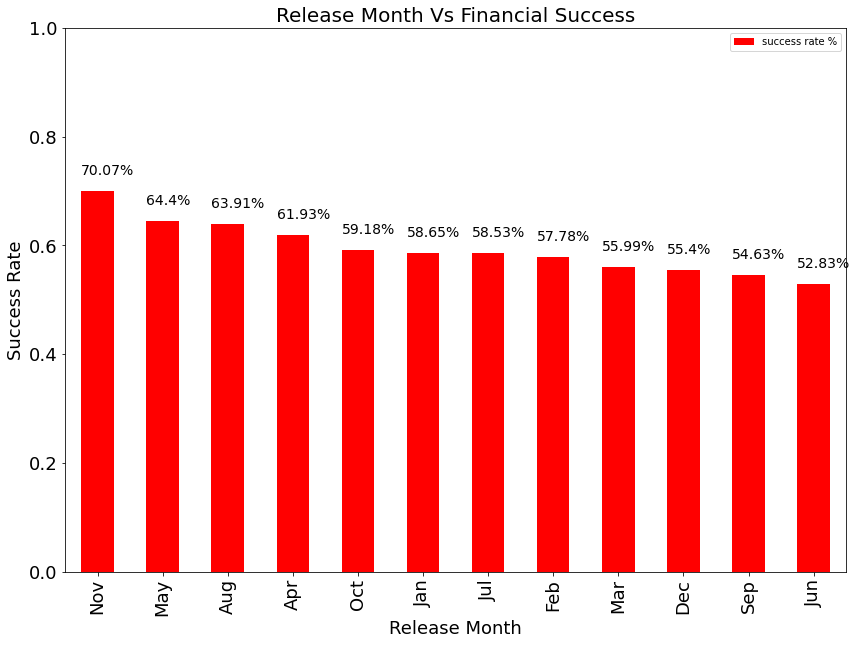

In [192]:
#cleaning slicing only the month from the data
# df_budget_genre['release_month'] = df_budget_genre['release_date'].map(lambda x : x[:3])


df_budget_genre[df_budget_genre['fin_success'] == True].groupby('release_month')['id'].count()

#compiling the wins per month into a category 

month_success_total = dict(df_budget_genre[df_budget_genre['fin_success'] == True].groupby('release_month')['id'].count())

month_total = dict(df_budget_genre.groupby('release_month')['id'].count())
                   

m1= month_success_total
m2= month_total

m3={x:float(m1[x])/m2[x] for x in m2}

month_percent = pd.DataFrame.from_dict(m3, orient= 'index')

#rename the col

# .sort_values(by='id', ascending = False)

month_percent.rename(columns = {month_percent.columns[0] : "success rate %"}, inplace=True)

x= month_percent.sort_values(by = "success rate %", ascending = False)


ax = x.plot(kind ='bar', fontsize= 18, colormap = 'autumn', figsize =(14, 10), ylim = (0, 1) )

ax.set_title("Release Month Vs Financial Success", fontsize = 20)
ax.set_ylabel('Success Rate', fontsize= 18)
ax.set_xlabel("Release Month", fontsize=18)


#annotating the bar graph 



for i in ax.patches:
    
    ax.text(i.get_x(), i.get_height()+.03, \
            str(round((i.get_height())*100, 2))+'%', fontsize=14,
                color='black')
    
#release month totals table

df_month_release_totals = pd.DataFrame.from_dict(m2, orient= 'index')
#rename col to count
df_month_release_totals.rename(columns = {df_month_release_totals.columns[0] : "# of Releases"}, inplace=True)







In [185]:
# def splitDataFrameList(df,target_column,separator):
#     row_accumulator = []
#     def splitListToRows(row, separator):
#         split_row = row[target_column].split(separator)
#         for s in split_row:
#             new_row = row.to_dict()
#             new_row[target_column] = s
#             row_accumulator.append(new_row)
#     df.apply(splitListToRows, axis=1, args = (separator, ))
#     new_df = pd.DataFrame(row_accumulator)
#     return new_df
# df_imdb_mtitle = df_imdb_titleb[df_imdb_titleb['genres'].notnull()]

# single_genre = splitDataFrameList(df_imdb_mtitle,'genres',',')

# budget_genre= df_budget.merge(single_genre, left_on='movie', right_on='primary_title')



budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False) # sorted genres by data



genre_total= dict(budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False))



# budget_genre[budget_genre['fin_success'] == True].groupby('genres').count().sort_values('fin_success', ascending= False)

genre_success_total= dict(budget_genre[budget_genre['fin_success_x'] == True].groupby('genres')['genres'].count().sort_values(ascending = False))


#delete news and reality tv form data set

del genre_total['News']
del genre_total['Reality-TV']

len(genre_total)



genre_success_total

#delete News from genre_success_total so that both lists match

del genre_success_total['News']
len(genre_total)== len(genre_success_total)

True

In [186]:
budget_genre[budget_genre['fin_success_x'] == True].groupby('genres')['genres'].count().sum()

5347

In [187]:
budget_genre.groupby('genres')['genres'].count().sum()


8668

In [188]:

 
# return the percentages of success of each genre

d1= genre_success_total
d2= genre_total

d3={x:float(d1[x])/d2[x] for x in d2}

d3={k: v for k, v in sorted(d3.items(), key=lambda item: item[1])}



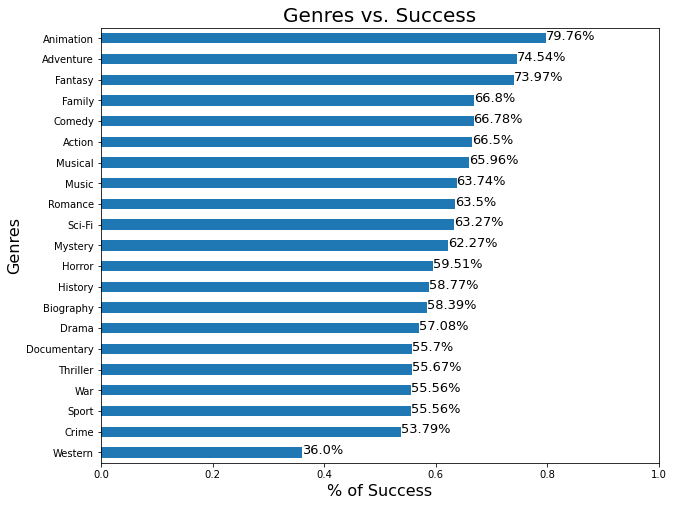

In [189]:
df_percentage = pd.DataFrame.from_dict(d3, orient= 'index')

ax = df_percentage.plot.barh(figsize =(10, 8), legend=False)
ax.set_title("Genres vs. Success", fontsize=20)
ax.set_ylabel('Genres', fontsize= 16)
ax.set_xlabel("% of Success", fontsize=16)
ax.set_xlim(0,1)




for i in ax.patches:
    
    ax.text(i.get_width(), i.get_y()+.18, \
            str(round((i.get_width())*100, 2)) +'%', fontsize=13, color='Black')


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [27]:
# Here you run your code to model the data




## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***